# Bài tập 4 - Tổng quan học máy

*(Thống kê máy tính và ứng dụng - ĐTTX Kì 2 2023-2024)*

MSSV: 22850034

Họ và tên: Cao Hoài Việt

Bài tập này thực hiện trên bộ dữ liệu `California Housing` (https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) với các yêu cầu sau.

## Yêu cầu 1 (1 đ)

1. Mô tả bộ dữ liệu.

2. Nạp bộ dữ liệu.

In [7]:
# Describle the data and load the data
# https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

# Bộ dữ liệu California housing là một bộ dữ liệu gồm 20.640 quan sát về các ngôi nhà tại California.
# Nó được xuất hiện lần đầu trong một bài báo năm 1997 có tiêu đề Sparse Spatial Autoregressions của Pace, R. Kelley và Ronald Barry
# Được xuất bản trong tạp chí Statistics and Probability Letters.
# Bộ dữ liệu này có sẵn từ kho lưu trữ StatLib và đã được sử dụng trong nhiều bài báo về Machine Learning.

# Bộ dữ liệu này được tạo ra từ cuộc điều tra dân số Hoa Kỳ năm 1990, sử dụng một hàng cho mỗi nhóm khối dân cư.
# Một nhóm khối là đơn vị địa lý nhỏ nhất mà Cục Thống kê Dân số Hoa Kỳ công bố dữ liệu mẫu
# (một nhóm - block groups thường có dân số từ 600 đến 3.000 người).

# Một hộ gia đình là một nhóm người cư trú trong một ngôi nhà.
# Vì số phòng trung bình và số phòng ngủ trong bộ dữ liệu này được cung cấp theo hộ gia đình,
# các cột này có thể có giá trị lớn đáng ngạc nhiên đối với các nhóm khối có ít hộ gia đình và nhiều ngôi nhà trống, chẳng hạn như các khu nghỉ dưỡng.

import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

x, y = fetch_california_housing(return_X_y=True, as_frame=True)
x.describe()

x.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


## Yêu cầu 2 (2 đ)

Phân tích thăm dò dữ liệu với biến mục tiêu là giá nhà (`MedInc`).

In [ ]:
# Histogram for the MedInc feature
x['MedInc'].hist()


## Yêu cầu 3 (3.5 đ)

Phân tích giá nhà theo các biến khác.

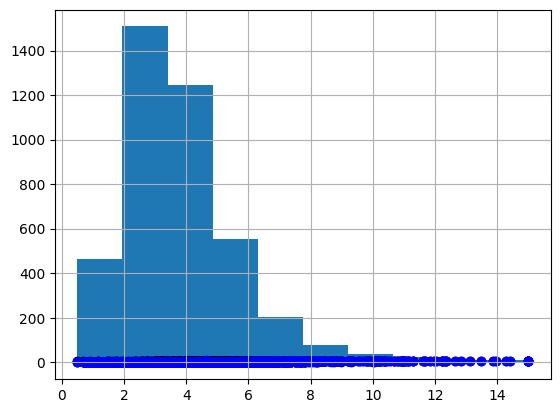

In [11]:
# Linear Regression for the MedHouseVal feature
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mean_squared_error(y_test, y_pred)

# Predict the MedHouseVal feature
x_test['MedInc'].hist()
y_pred = model.predict(x_test)
y_pred

# Plot the MedInc feature and the MedHouseVal feature
import matplotlib.pyplot as plt

plt.scatter(x_test['MedInc'], y_test, color='black')
plt.scatter(x_test['MedInc'], y_pred, color='blue')
plt.show()



## Yêu cầu 4 (3.5 đ)

1. Tìm hiểu kĩ thuật *giảm chiều dữ liệu* (dimensionality reduction) **PCA** (Principal Component Analysis).

2. Dùng PCA để rút gọn các đặc trưng (các biến còn lại trừ giá nhà) thành 2 chiều (2 biến mới).

3. Phân tích lại giá nhà theo 2 biến mới này và so sánh kết quả với Yêu cầu 3.